In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import apyori

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
df = pd.read_csv('hugi.csv',index_col='id')
df.head(5)

,cs
id,
1,먹는 내내 아찔한 느낌이 사라지질 않습니다 제가 찾던 맛있는 매운 맛이 여기...
2,누린내도 안나고 막장도 넉넉하게 주셔서 좋았어요 너무 맛있어요 데마워요! 고마시안샵
3,유산균을 꽤나 오랫동안 복용했었는데요 약이라는게 먹을때는 모르다가 안먹으면 왜 먹...
4,이거 너무 맛있어요 순한맛도 맵다기에 맵찔이라 두 팩만 주문했는데 과거의 나는 반...
5,아니 맛은 있고 식감도 좋아요 근데 포장에 그려진 토끼가 귀여워서 샀는데 박스가 서...


In [4]:

f = open("hugi.csv",'r',encoding='utf-8')
lines = f.readlines()
f.close()


In [225]:
dataset = []     


for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
    
dataset = [[y for y in x if not len(y)==1] for x in dataset]
dataset = [[y for y in x if not y.isdigit()]for x in dataset]

dataset[:5]

[[],
 ['느낌', '사라지', '제가', '여기', '데마워', '고마시안샵'],
 ['누린내', '막장', '데마워', '고마시안샵'],
 ['유산균',
  '오랫동안',
  '복용',
  '회사',
  '추천',
  '비타민',
  '비타민엔젤스로',
  '엔젤',
  '스로',
  '구입',
  '만족',
  '가격',
  '약크기',
  '크기'],
 ['이거', '맵찔', '주문', '과거', '반성', '반성중', '재주', '재주문']]

In [87]:
clean_word = pd.DataFrame(dataset)
clean_word.to_csv("clean_word.csv", encoding="euc-kr")

### Clean Word 데이터

In [265]:

clean_word = open("clean_word.csv", encoding='utf-8')
cw = clean_word.readlines()

In [266]:
cdata = []     


for v in range(len(cw)):
    cdata.append(kkma.nouns(cw[v]))
    
cdata = [[n for n in x if not len(n)==1] for x in cdata]
cdata = [[n for n in x if not n.isdigit()]for x in cdata]

cdata[:4]

[['느낌', '사라지', '제가', '여기', '데마워', '고마시안샵'],
 ['누린내', '데마워', '고마시안샵'],
 ['유산균',
  '오랫동안',
  '복용',
  '회사',
  '추천',
  '비타민',
  '비타민엔젤스로',
  '엔젤',
  '스로',
  '구입',
  '만족',
  '가격',
  '약크기',
  '크기'],
 ['이거', '맵찔', '구매', '과거', '반성', '반성중']]

In [267]:
!pip install apyori pip

In [268]:
from apyori import apriori

In [269]:
result = (list(apriori(cdata,min_support=0.01)))

In [270]:
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length']== 2) & (df['support']>=0.02)].sort_values(by='support',ascending=False)


In [271]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [272]:
pr = nx.pagerank(G)

In [273]:

nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [274]:
import matplotlib

In [275]:
import matplotlib.font_manager as fm

In [276]:
fm.get_fontconfig_fonts()
font_location = 'C:\jupyter/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [277]:
%matplotlib inline

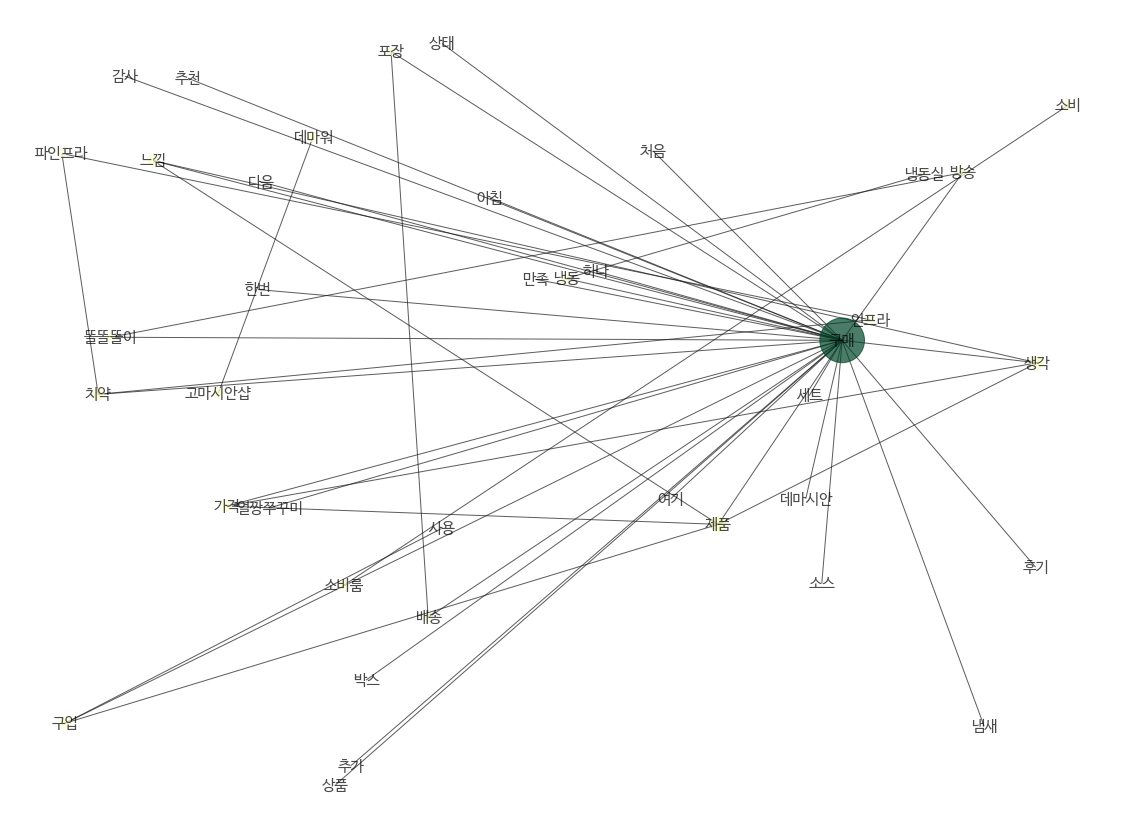

In [278]:
pos = nx.random_layout(G)
plt.figure(figsize=(20,15)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)


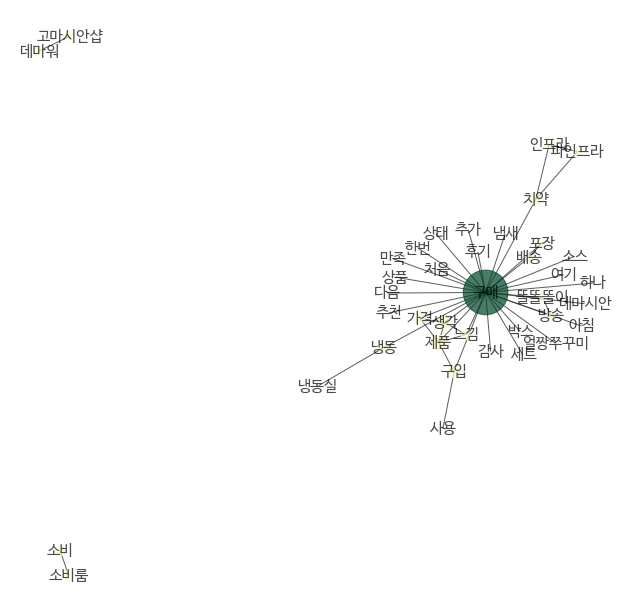

In [279]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(11,11)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)

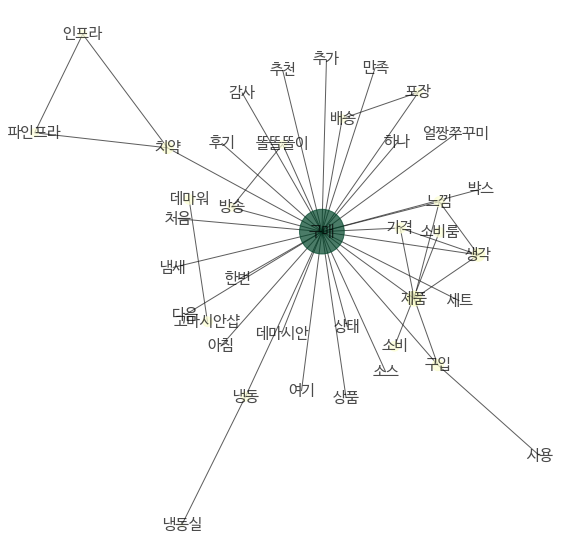

In [280]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10,10)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)

### 단어간 유사도 분석

In [117]:
! pip install Mlxtend pip

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#te = TransactionEncoder()
#te_ary = te.fit(dataset).transform(dataset)
#df = pd.DataFrame(te_ary, columns=te.columns_) 

In [ ]:
#df.head(5)

In [ ]:
#frequent_itemsets = apriori(df,min_support=0.05)
#frequent_itemsets

In [ ]:
! pip install gensim

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(dataset,
                 sg=1,
                 window=5,
                 min_count=1           
                )
model.init_sims(replace=True)

In [ ]:
print("방송과 결제 단어간 유사도는 %.2f " %(model.wv.similarity('방송','결제')))

In [ ]:
df = pd.DataFrame(model.wv.most_similar("구매",topn=200),columns=['단어','유사도'])

df.head(10)

In [ ]:
keyword = ['데마시안','만족','똘똘똘이','방송','결제','재주문','주문']
df = df[df['단어'].isin(keyword)]

df

In [ ]:
df1 = pd.DataFrame(model.wv.most_similar(df.iloc[0]['단어'],topn=50),columns=['단어',df.iloc[0]["단어"]])
df2 = pd.DataFrame(model.wv.most_similar(df.iloc[1]['단어'],topn=50),columns=['단어',df.iloc[1]["단어"]])
df3 = pd.DataFrame(model.wv.most_similar(df.iloc[2]['단어'],topn=50),columns=['단어',df.iloc[2]["단어"]])
df4 = pd.DataFrame(model.wv.most_similar(df.iloc[3]['단어'],topn=50),columns=['단어',df.iloc[3]["단어"]])
df5 = pd.DataFrame(model.wv.most_similar(df.iloc[4]['단어'],topn=50),columns=['단어',df.iloc[4]["단어"]])


dfs = [df.set_index(['단어']) for df in [df1,df2,df3,df4,df5]]
df5 = pd.concat(dfs,join='inner',axis=1).reset_index()
df5